In [40]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset using sklearn
from sklearn.datasets import load_boston, load_digits, load_wine, load_breast_cancer
data = load_digits()
from sklearn.datasets import fetch_openml
data = fetch_openml("parkinsons")
#Separating data into feature variable X and target variable y respectively
X=data['data']
y=data['target']

#Extracting the names of the features from data
features = data['feature_names']

#Splitting X & y into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=50)

from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)

#Checking the model's performance on the test set
print('R2 score for the model on test set =', reg.score(X_test, y_test))

R2 score for the model on test set = 0.7362941558441558


# GMM

In [41]:
from sklearn.mixture import GaussianMixture

def f_bic(n):
    gmm = GaussianMixture(n_components=int(n[0][0]))
    gmm.fit(X)
    return np.array([[gmm.bic(X)]])

def f_aic(n):
    gmm = GaussianMixture(n_components=int(n[0][0]))
    gmm.fit(X)
    return np.array([[gmm.aic(X)]])


In [42]:
f_aic([[40]])

array([[-11178.25518481]])

100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:28<00:00,  1.78it/s]


Text(0.5, 0, 'Number of clusters')

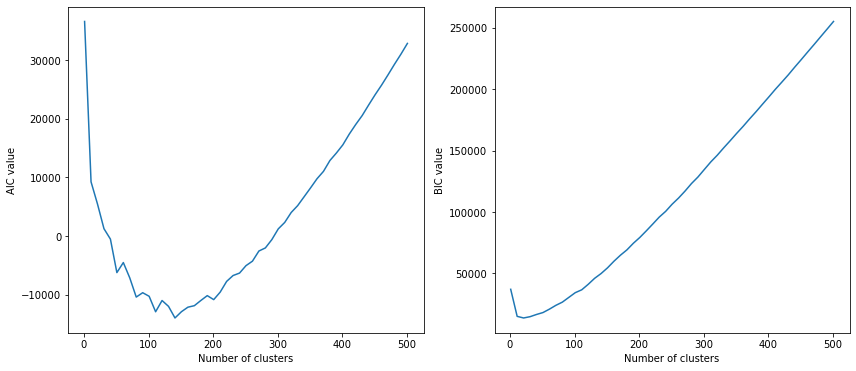

In [22]:
from tqdm import tqdm
plt.rcParams['figure.figsize'] = 14, 6


bic = []
aic = []
for val in tqdm(range(1,X.shape[0],10)):
    bic.append(f_bic([[val]]).ravel())
    aic.append(f_aic([[val]]).ravel())

plt.subplot(1,2,1)
plt.plot(range(1,X.shape[0],10), aic)
plt.ylabel("AIC value")
plt.xlabel("Number of clusters")

plt.subplot(1,2,2)
plt.plot(range(1,X.shape[0],10), bic)
plt.ylabel("BIC value")
plt.xlabel("Number of clusters")

# np.gradient(bic)
# plt.subplot(1,3,3)
# plt.plot(np.gradient(np.array(bic).ravel()))

ValueError: x and y must have same first dimension, but have shapes (180,) and (51, 1)

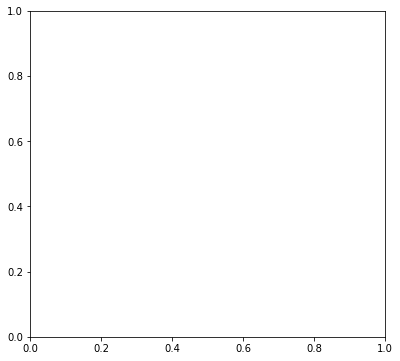

In [37]:
plt.subplot(1,2,1)
plt.plot(range(1,X.shape[0],10), aic)
plt.ylabel("AIC")
plt.xlabel("Number of clusters")

plt.subplot(1,2,2)
plt.plot(range(1,X.shape[0],10), bic)
plt.ylabel("BIC")
plt.xlabel("Number of clusters")
plt.savefig("results/gmm_aic_bic.png", dpi=300)

num acquisition: 1, time elapsed: 0.29s
num acquisition: 2, time elapsed: 0.63s
num acquisition: 3, time elapsed: 0.92s
num acquisition: 4, time elapsed: 1.24s
num acquisition: 5, time elapsed: 1.58s
num acquisition: 6, time elapsed: 1.86s


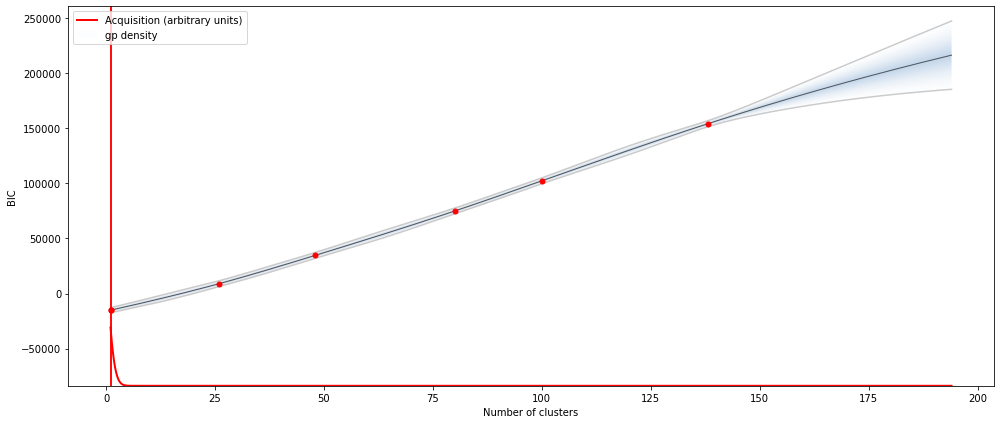

In [44]:
import GPy
import GPyOpt
from GPyOpt.methods import BayesianOptimization
plt.rcParams['figure.figsize'] = 14, 6

bounds = np.array([range(1, X.shape[0])])

X_init = np.array([[100]])
Y_init = f_bic(X_init)

kernel = GPy.kern.Matern32(input_dim=1)
# kernel = GPy.kern.Linear(input_dim=1)
bds = [{'name': 'X', 'type': 'discrete', 'domain': bounds.ravel()}]

optimizer = BayesianOptimization(f=f_bic, 
                                 domain=bds,
                                 model_type='GP',
                                 kernel=kernel,
                                 acquisition_type ='EI',
                                 acquisition_jitter=5,
                                 X=X_init,
                                 Y=Y_init,
                                 exact_feval=False,
                                 normalize_Y=False,
                                 maximize=False,
                                noise_var=0)

optimizer.run_optimization(max_iter=20,verbosity=True)
optimizer.plot_acquisition(filename="results/gmm_bo_bic_parkinsons.png",label_x="Number of clusters",label_y="BIC")

In [45]:
optimizer.x_opt, optimizer.fx_opt


(array([1]), -15046.639856092612)

num acquisition: 1, time elapsed: 0.75s
num acquisition: 2, time elapsed: 1.05s
num acquisition: 3, time elapsed: 1.66s
num acquisition: 4, time elapsed: 2.29s
num acquisition: 5, time elapsed: 2.78s
num acquisition: 6, time elapsed: 3.25s
num acquisition: 7, time elapsed: 3.74s
num acquisition: 8, time elapsed: 4.19s
num acquisition: 9, time elapsed: 4.81s
num acquisition: 10, time elapsed: 5.38s
num acquisition: 11, time elapsed: 5.82s
num acquisition: 12, time elapsed: 6.31s
num acquisition: 13, time elapsed: 6.75s
num acquisition: 14, time elapsed: 7.18s
num acquisition: 15, time elapsed: 7.63s
num acquisition: 16, time elapsed: 8.24s
num acquisition: 17, time elapsed: 8.82s
num acquisition: 18, time elapsed: 9.27s
num acquisition: 19, time elapsed: 9.77s
num acquisition: 20, time elapsed: 10.39s


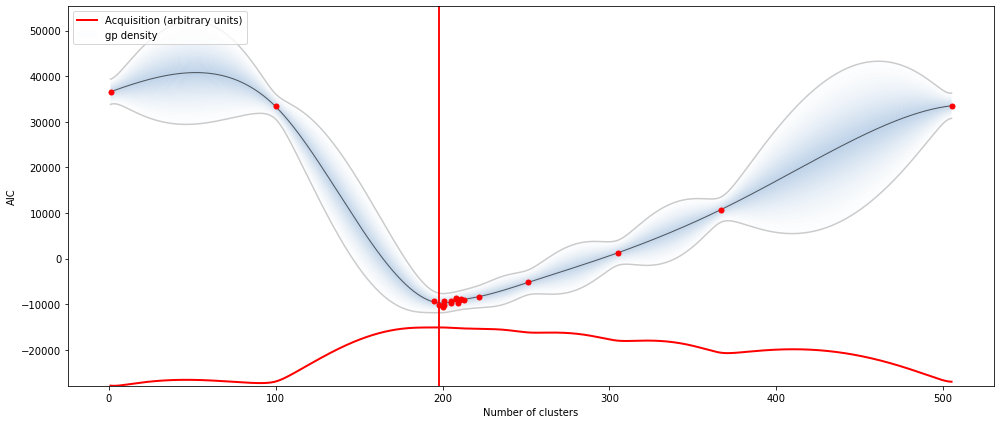

In [26]:
optimizer = BayesianOptimization(f=f_aic, 
                                 domain=bds,
                                 model_type='GP',
                                 kernel=kernel,
                                 acquisition_type ='LCB',
                                 acquisition_jitter=5,
                                 X=X_init,
                                 Y=Y_init,
                                 exact_feval=False,
                                 normalize_Y=False,
                                 maximize=False,
                                noise_var=0)

optimizer.run_optimization(max_iter=20,verbosity=True)
optimizer.plot_acquisition(filename="results/gmm_bo_aic_digits.png",label_x="Number of clusters",label_y="AIC")

In [27]:
optimizer.x_opt, optimizer.fx_opt

(array([200]), -10527.651451446633)

Doubt: Can the variance in GMM fit be computed in close form?

# Bayesian GMM

In [ ]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
gmm = GaussianMixture(n_components=X.shape[0],verbose=1,init_params='random')
gmm.fit(X)

In [ ]:
gmm.predict(X)

In [ ]:
np.unique(gmm.predict(X)).shape

In [ ]:
gmm_2 = BayesianGaussianMixture(n_components=X.shape[0],verbose=1,max_iter=1000,init_params='random',weight_concentration_prior_type='dirichlet_distribution',covariance_type='full')
gmm_2.fit(X)
gmm_2.predict_proba(X).shape

In [ ]:
np.unique(gmm_2.predict(X)).shape

In [ ]:
plt.stem(gmm_2.weights_)

In [ ]:
plt.scatter(X[:,2], X[:,3], c=gmm_2.predict(X))

# AHC

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris, load_boston, load_wine, load_boston, load_breast_cancer, load_digits, load_diabetes
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


data = load_boston()
X = data['data']
y = data['target']

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE

X_lowdim_tsne = TSNE(n_components=2, random_state=100).fit_transform(X)
df_lowdim_tsne = pd.DataFrame({'Feature_0':X_lowdim_tsne[:,0],'Feature_1':X_lowdim_tsne[:,1],'Target':y})
sns.scatterplot(data=df_lowdim_tsne, x='Feature_0', y='Feature_1', hue='Target')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(X)
X_lowdim_pca = PCA(n_components=2, random_state=100).fit_transform(X_scaled)
df_lowdim_pca = pd.DataFrame({'Feature_0':X_lowdim_pca[:,0],'Feature_1':X_lowdim_pca[:,1],'Target':y})
sns.scatterplot(data=df_lowdim_pca, x='Feature_0', y='Feature_1', hue='Target')

In [ ]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9.0, 5.0)
    plt.ylim(-3.0, 6.0)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)


# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0.0, -0.1], [1.7, 0.4]])
X = np.r_[
    np.dot(np.random.randn(n_samples, 2), C),
    0.7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
]

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type="full").fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=5, covariance_type="full").fit(X)
plot_results(
    X,
    dpgmm.predict(X),
    dpgmm.means_,
    dpgmm.covariances_,
    1,
    "Bayesian Gaussian Mixture with a Dirichlet process prior",
)

plt.show()

In [ ]:
plt.stem(dpgmm.weights_)
dpgmm.weights_

In [ ]:
X

In [ ]:
dpgmm.predict_proba(X).shape

In [ ]:
dpgmm.predict(X)

In [ ]:
dpgmm.weight_concentration_prior